<a href="https://colab.research.google.com/github/sid-vt/DL-Research/blob/main/2DCNN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

from PIL import Image
import cv2

import random
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 3000

# import h5py
# import torchvision

In [147]:
# f=[]
# for i in range(100):
#   f.append(float("{0:.4f}".format(random.uniform(-math.pi/2, math.pi/2))))
# (unique, counts) = np.unique(f, return_counts=True)
# frequencies = np.asarray((unique, counts)).T
# frequencies
# counts.sort()
# counts

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
# top left corner +1 and bottom corner as it is 
# img_read[y1+1:y2, x1:x2]

image = []
for image_path in glob.glob('/content/drive/MyDrive/Colab Notebooks/ResearchCNN/MisesFiles_12/*.png'):
    img_read = cv2.imread(image_path)
    crop_img = img_read[81:147, 80:147]
    resize = cv2.resize(crop_img, (64, 64))
    image.append(resize)
    # image.append(crop_img)
image12 = np.asarray(image)

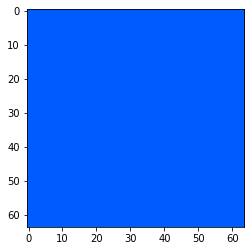

In [150]:
data = image12[15]
img_show = Image.fromarray(image12[15], 'RGB')
plt.imshow(data, interpolation='nearest')
plt.show()

In [151]:
image = []
for image_path in glob.glob('/content/drive/MyDrive/Colab Notebooks/ResearchCNN/MisesFiles_24/*.png'):
    img_read = cv2.imread(image_path)
    crop_img = img_read[81:147, 80:147]
    resize = cv2.resize(crop_img, (64, 64))
    image.append(resize)
    # image.append(crop_img)
image24 = np.asarray(image)

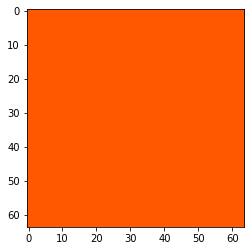

In [152]:
data = image24[15]
img_show = Image.fromarray(image12[15], 'RGB')
plt.imshow(data, interpolation='nearest')
plt.show()

In [153]:
X12 = image12
X24 = image24

In [154]:
X12.shape
X24.shape

(100, 64, 64, 3)

In [155]:
X12_single = X12.mean(axis=3).mean(axis=2).mean(axis=1)
X12_single

array([131.33333333, 131.33333333, 146.66666667, 146.66666667,
       115.66666667, 115.66666667, 100.33333333, 146.66666667,
       115.66666667, 162.        , 146.66666667, 146.66666667,
       146.66666667, 146.66666667, 115.66666667, 115.66666667,
       115.66666667, 115.66666667, 162.        , 115.66666667,
        85.        , 162.        , 131.33333333, 115.66666667,
       162.        , 115.66666667, 115.66666667, 115.66666667,
        85.        , 131.33333333, 162.        , 162.        ,
       131.33333333, 146.66666667, 146.66666667, 146.66666667,
       115.66666667,  85.        , 115.66666667,  85.        ,
       115.66666667, 115.66666667,  85.        , 146.66666667,
        85.        , 162.        , 146.66666667,  85.        ,
       115.66666667,  85.        , 100.33333333, 131.33333333,
        85.        , 131.33333333, 131.33333333,  85.        ,
        85.        , 146.66666667, 115.66666667, 115.66666667,
       115.66666667, 162.        , 100.33333333,  85.  

In [156]:
X24_single = X24.mean(axis=3).mean(axis=2).mean(axis=1)
X24_single

array([129.33333333,  85.        ,  99.66666667, 121.66666667,
       151.33333333, 114.33333333, 129.33333333,  85.        ,
        99.66666667,  99.66666667, 144.        ,  99.66666667,
       129.33333333, 121.66666667, 121.66666667, 114.33333333,
        99.66666667, 114.33333333, 121.66666667, 144.        ,
       166.        , 129.33333333,  99.66666667, 107.        ,
        85.        ,  99.66666667, 144.        , 144.        ,
       144.        ,  92.33333333, 114.33333333, 151.33333333,
       107.        , 129.33333333, 121.66666667, 129.33333333,
       129.33333333, 121.66666667, 107.        , 121.66666667,
       136.66666667, 114.33333333, 107.        ,  99.66666667,
       158.66666667, 114.33333333, 114.33333333, 158.66666667,
       158.66666667, 151.33333333, 114.33333333, 158.66666667,
        85.        , 121.66666667, 114.33333333, 129.33333333,
       144.        , 114.33333333, 107.        , 151.33333333,
       166.        , 114.33333333, 114.33333333, 121.66

In [157]:
# Scaling with min max
X12norm = (X12_single - X12_single.min())/(X12_single.max() - X12_single.min())
X12norm

array([0.6017316, 0.6017316, 0.8008658, 0.8008658, 0.3982684, 0.3982684,
       0.1991342, 0.8008658, 0.3982684, 1.       , 0.8008658, 0.8008658,
       0.8008658, 0.8008658, 0.3982684, 0.3982684, 0.3982684, 0.3982684,
       1.       , 0.3982684, 0.       , 1.       , 0.6017316, 0.3982684,
       1.       , 0.3982684, 0.3982684, 0.3982684, 0.       , 0.6017316,
       1.       , 1.       , 0.6017316, 0.8008658, 0.8008658, 0.8008658,
       0.3982684, 0.       , 0.3982684, 0.       , 0.3982684, 0.3982684,
       0.       , 0.8008658, 0.       , 1.       , 0.8008658, 0.       ,
       0.3982684, 0.       , 0.1991342, 0.6017316, 0.       , 0.6017316,
       0.6017316, 0.       , 0.       , 0.8008658, 0.3982684, 0.3982684,
       0.3982684, 1.       , 0.1991342, 0.       , 0.8008658, 0.8008658,
       0.3982684, 0.3982684, 0.6017316, 0.3982684, 0.       , 0.1991342,
       0.1991342, 0.6017316, 0.1991342, 0.3982684, 0.3982684, 1.       ,
       0.       , 0.6017316, 0.3982684, 0.3982684, 

In [169]:
X24norm = (X24_single - X24_single.min())/(X24_single.max() - X24_single.min())
X24norm

array([0.5473251 , 0.        , 0.18106996, 0.4526749 , 0.81893004,
       0.36213992, 0.5473251 , 0.        , 0.18106996, 0.18106996,
       0.72839506, 0.18106996, 0.5473251 , 0.4526749 , 0.4526749 ,
       0.36213992, 0.18106996, 0.36213992, 0.4526749 , 0.72839506,
       1.        , 0.5473251 , 0.18106996, 0.27160494, 0.        ,
       0.18106996, 0.72839506, 0.72839506, 0.72839506, 0.09053498,
       0.36213992, 0.81893004, 0.27160494, 0.5473251 , 0.4526749 ,
       0.5473251 , 0.5473251 , 0.4526749 , 0.27160494, 0.4526749 ,
       0.63786008, 0.36213992, 0.27160494, 0.18106996, 0.90946502,
       0.36213992, 0.36213992, 0.90946502, 0.90946502, 0.81893004,
       0.36213992, 0.90946502, 0.        , 0.4526749 , 0.36213992,
       0.5473251 , 0.72839506, 0.36213992, 0.27160494, 0.81893004,
       1.        , 0.36213992, 0.36213992, 0.4526749 , 0.36213992,
       0.18106996, 0.81893004, 0.36213992, 0.36213992, 0.81893004,
       0.36213992, 0.36213992, 0.27160494, 0.36213992, 0.27160

In [170]:
# y = []
# for i in range (X.shape[0]):
#     temp = X[i].mean()
#     y.append(temp)

In [171]:
# X = np.array(y)

In [172]:
y12 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/ResearchCNN/MisesFiles_12/results.txt')
y12norm = (y12 - y12.min())/(y12.max() - y12.min())
y12norm

array([0.31240073, 0.97630487, 0.45717335, 0.32810979, 0.6617581 ,
       0.09344794, 0.99019417, 0.99376232, 0.98845972, 0.04173491,
       0.98898419, 0.47555996, 0.76196271, 0.97503957, 0.80633126,
       0.0034585 , 0.8965379 , 0.64886975, 0.9553336 , 0.15350148,
       0.82259759, 0.98645767, 0.76069431, 0.97711326, 0.85377543,
       0.06784888, 0.06154645, 0.09075054, 0.20594422, 0.84254595,
       0.87331263, 0.77840316, 0.8211904 , 0.0824113 , 0.58474019,
       0.67038252, 0.45617057, 0.92991316, 0.63018725, 0.02549518,
       0.59352593, 0.36401269, 0.92829103, 0.66661365, 0.9629841 ,
       0.75034022, 0.92443306, 0.05350253, 0.0044693 , 0.9029079 ,
       0.11765714, 0.63887473, 0.5697476 , 0.18809039, 0.97087079,
       0.17249408, 0.04372499, 0.05588195, 0.58301854, 0.79518187,
       0.65931561, 0.92954268, 0.39699988, 0.18757647, 0.0977907 ,
       0.86977559, 0.02419089, 0.00618377, 0.04425566, 0.02188227,
       0.90804117, 0.9608237 , 0.02223685, 0.        , 0.23405

In [173]:
y24 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/ResearchCNN/MisesFiles_24/results.txt')
y24norm = (y24 - y24.min())/(y24.max() - y24.min())
y24norm

array([0.31240073, 0.97630487, 0.45717335, 0.32810979, 0.6617581 ,
       0.09344794, 0.99019417, 0.99376232, 0.98845972, 0.04173491,
       0.98898419, 0.47555996, 0.76196271, 0.97503957, 0.80633126,
       0.0034585 , 0.8965379 , 0.64886975, 0.9553336 , 0.15350148,
       0.82259759, 0.98645767, 0.76069431, 0.97711326, 0.85377543,
       0.06784888, 0.06154645, 0.09075054, 0.20594422, 0.84254595,
       0.87331263, 0.77840316, 0.8211904 , 0.0824113 , 0.58474019,
       0.67038252, 0.45617057, 0.92991316, 0.63018725, 0.02549518,
       0.59352593, 0.36401269, 0.92829103, 0.66661365, 0.9629841 ,
       0.75034022, 0.92443306, 0.05350253, 0.0044693 , 0.9029079 ,
       0.11765714, 0.63887473, 0.5697476 , 0.18809039, 0.97087079,
       0.17249408, 0.04372499, 0.05588195, 0.58301854, 0.79518187,
       0.65931561, 0.92954268, 0.39699988, 0.18757647, 0.0977907 ,
       0.86977559, 0.02419089, 0.00618377, 0.04425566, 0.02188227,
       0.90804117, 0.9608237 , 0.02223685, 0.        , 0.23405

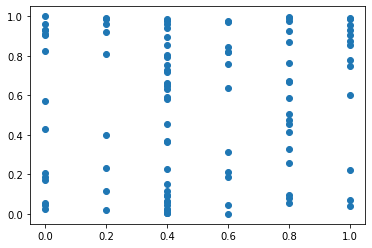

In [174]:
plt.scatter(X12norm, y12norm)

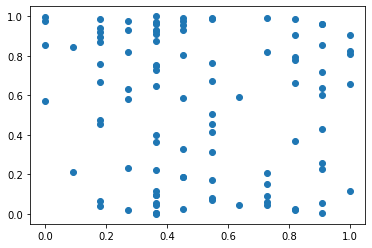

In [177]:
plt.scatter(X24norm, y12norm)

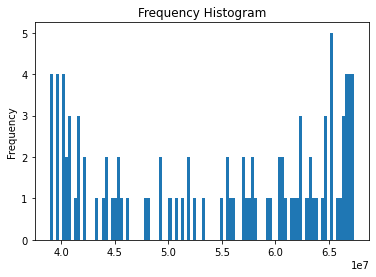

In [178]:
# x = np.random.normal(size = 1000)
plt.hist(y24, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [180]:
(unique, counts) = np.unique(X24norm, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[ 0.        ,  4.        ],
       [ 0.09053498,  2.        ],
       [ 0.18106996, 11.        ],
       [ 0.27160494,  7.        ],
       [ 0.36213992, 22.        ],
       [ 0.4526749 , 10.        ],
       [ 0.5473251 , 11.        ],
       [ 0.63786008,  2.        ],
       [ 0.72839506,  7.        ],
       [ 0.81893004,  8.        ],
       [ 0.90946502, 11.        ],
       [ 1.        ,  5.        ]])

In [185]:
(unique, counts) = np.unique(y24, return_counts=True)
frequencies = np.asarray((unique, counts)).T
counts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12norm , test_size=0.1)
X24_train, X24_test, y24_train, y24_test = train_test_split(X24, y24norm , test_size=0.1)

In [76]:
X12_train.shape

(90, 64, 64, 3)

In [77]:
y12_train.shape

(90,)

In [78]:
X24_train.shape

(90, 64, 64, 3)

In [79]:
y24_train.shape

(90,)

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(2,2 ), activation='relu', kernel_initializer='glorot_uniform', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='linear'))

model.summary()

In [ ]:
# Compile the model
model.compile( loss=tf.keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.Adam(lr=0.00001),
              metrics=['mae'])

# Fit data to model
history = model.fit(X12_train ,y12_train, validation_data=(X12_test,y12_test),
            batch_size=2,
            epochs=500,
            verbose=1)

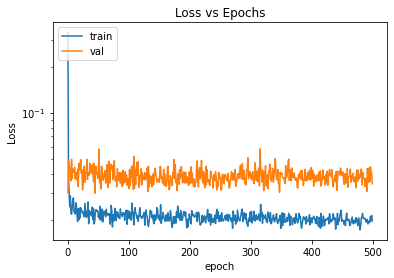

In [ ]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions_all = model.predict(X12)
predictions_train = model.predict(X12_train)
predictions_test = model.predict(X12_test)

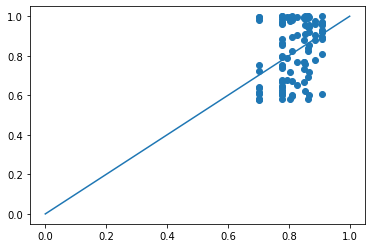

In [ ]:
xlim = 1
x = np.linspace(0,xlim,11)
plt.plot(x, x)

# x = np.linspace(1,1,10)
plt.scatter(predictions_all,y12)
# plt.plot(x,x)

In [80]:
# model = Sequential()

# model.add(Conv2D(64, kernel_size=(2,2 ), activation='relu', kernel_initializer='glorot_uniform', input_shape=(64,64,3)))
# # model.add(BatchNormalization(axis = 1))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.1))

# # model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', kernel_initializer='glorot_uniform'))
# # model.add(MaxPooling2D(pool_size=(2, 2,)))
# # model.add(Dropout(0.5))

# # model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', kernel_initializer='glorot_uniform'))
# # model.add(MaxPooling2D(pool_size=(2, 2,)))
# # model.add(Dropout(0.5))

# # model.add(Conv3D(256, kernel_size=(2, 2, 2), activation='relu', kernel_initializer='glorot_uniform'))
# # model.add(MaxPooling3D(pool_size=(2, 2, 2)))
# # model.add(BatchNormalization())

# # model.add(BatchNormalization(center=True, scale=True))
# # model.add(Dropout(0.5))


# model.add(Flatten())

# # model.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
# model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
# model.add(Dense(1, activation='linear'))

# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 61504)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               6150500   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 6,151,433
Trainable params: 6,151,433
Non-trainable params: 0
______________________________________________

In [81]:
# # Compile the model
# model.compile( loss=tf.keras.losses.MeanSquaredError(),
#               optimizer=keras.optimizers.Adam(lr=0.00001),
#               metrics=['mae'])

# # Fit data to model
# history = model.fit(X_train ,y_train, validation_data=(X_test,y_test),
#             batch_size=2,
#             epochs=500,
#             verbose=1)

NameError: ignored

In [ ]:
import seaborn as snsn

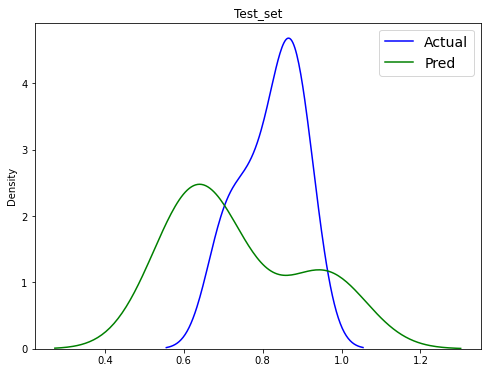

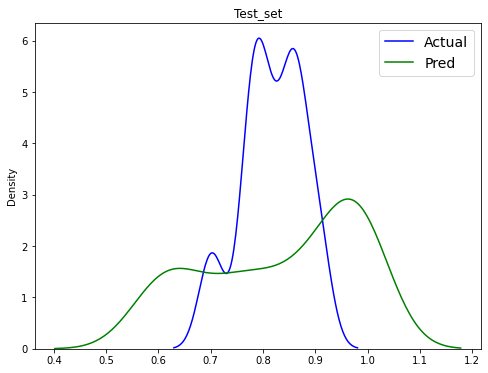

In [ ]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(predictions_test.ravel(),label="",ax=ax,c='b')
sns.kdeplot(y_test.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')

fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(predictions_train.ravel(),label="",ax=ax,c='b')
sns.kdeplot(y_train.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')


In [ ]:
sns.kdeplot(y,label="",ax=ax,c='b')

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(y.ravel(),label="",ax=ax,c='b')
# sns.kdeplot(y_test.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')